In [1]:
import datetime
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.basemap import Basemap

from matplotlib import animation

#%matplotlib
%matplotlib inline

In [14]:
## Set data dir
datadir = 'data/radar/'
ddate = 20140201
interval = 20

# Original grid dimensions
nx = 241
ny = 241

# pixel size (in meters)
dx = 1000.
dy = 1000.

downsizeby = 1

# Compute grid dimensions and grid coordinates after resampling
dx2, dy2 = dx*downsizeby, dy*downsizeby
nx2, ny2 = int(nx/downsizeby), int(ny/downsizeby)

X2, Y2 = np.meshgrid( np.arange(0,nx2*dx2, dx2), np.arange(0,ny2*dy2, dy2) )


# Define container
frames = np.zeros( (interval, nx2, ny2 ) )


### Reading files to numpy array (time,x,y)
for i in range(interval):
    d = str(datadir)+str(ddate)+'/'
    file = (sorted(os.listdir(datadir+str(ddate)))[i])
    xds = xr.open_dataset(d+file)
    rr = xds.rain_rate
    frames[i] =  rr
    
# Lat Lon coordinates
lon = xds.lon0.data
lat = xds.lat0.data
rkm = xds.rain_rate.height_km
runit = xds.rain_rate.units

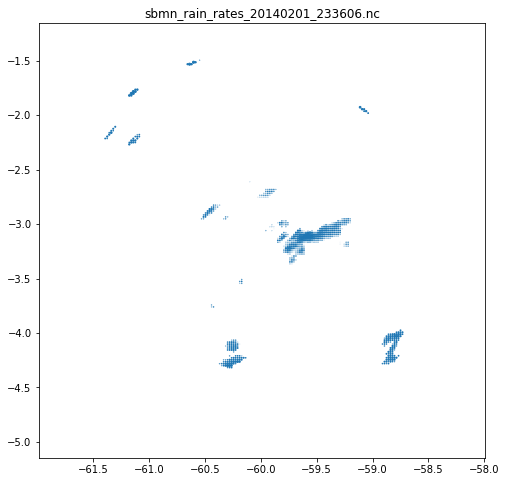

In [3]:
## Plot simple figure from dataset

figtime = 1

plt.figure(figsize=(8,8))
plt.title(os.listdir(datadir+str(ddate))[figtime])
plt.scatter(lon,lat,frames[figtime])
#plt.pcolormesh(lon,lat,frames[figtime])

In [4]:
### Without Radar range
frame = np.nan_to_num(frames[0])

In [ ]:
my_coords = [-3.148556, -59.992000]     ## RADAR T1 SIPAM COORDS
zoom_scale = 2.2                        ## ZOOM SCALE

fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(10,10),dpi=100)

# draw filled contours.
clevs = [0, 1, 2.5, 5, 7.5, 10, 15, 20, 30, 40,
             50, 70, 100]

cmap_data = [(1.0, 1.0, 1.0),
                 (0.3137255012989044, 0.8156862854957581, 0.8156862854957581),
                 (0.0, 1.0, 1.0),
                 (0.0, 0.8784313797950745, 0.501960813999176),
                 (0.0, 0.7529411911964417, 0.0),
                 (0.501960813999176, 0.8784313797950745, 0.0),
                 (1.0, 1.0, 0.0),
                 (1.0, 0.6274510025978088, 0.0),
                 (1.0, 0.0, 0.0),
                 (1.0, 0.125490203499794, 0.501960813999176),
                 (0.9411764740943909, 0.250980406999588, 1.0),
                 (0.501960813999176, 0.125490203499794, 1.0),
                 (0.250980406999588, 0.250980406999588, 1.0),
                 (0.125490203499794, 0.125490203499794, 0.501960813999176),
                 (0.125490203499794, 0.125490203499794, 0.125490203499794),
                 (0.501960813999176, 0.501960813999176, 0.501960813999176),
                 (0.8784313797950745, 0.8784313797950745, 0.8784313797950745),
                 (0.9333333373069763, 0.8313725590705872, 0.7372549176216125),
                 (0.8549019694328308, 0.6509804129600525, 0.47058823704719543),
                 (0.6274510025978088, 0.42352941632270813, 0.23529411852359772),
                 (0.4000000059604645, 0.20000000298023224, 0.0)]
cmap = mcolors.ListedColormap(cmap_data, 'precipitation')
norm = mcolors.BoundaryNorm(clevs, cmap.N)
ax = axes

label = 'Rain rate in ' + runit
title = os.listdir(datadir+str(ddate))[0]


## BASEMAP
bbox = [my_coords[0]-zoom_scale,my_coords[0]+zoom_scale,\
        my_coords[1]-zoom_scale,my_coords[1]+zoom_scale]

m = Basemap(projection='merc',llcrnrlat=bbox[0],urcrnrlat=bbox[1],\
            llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i')

## SIPAM RADAR
xm, ym = m(my_coords[1],my_coords[0])
radar = m.plot(xm,ym, marker='^',color='r', label='RADAR')

# # # # Add Grid Lines
m.drawparallels(np.arange(bbox[0],bbox[1],(bbox[1]-bbox[0])/5),labels=[1,0,0,0],rotation=45, size=(7))
m.drawmeridians(np.arange(bbox[2],bbox[3],(bbox[3]-bbox[2])/5),labels=[0,0,0,1],rotation=45, size=(7))
m.drawmapboundary(fill_color='gray')

m.drawcoastlines()
m.drawstates()
m.drawcountries()
m.drawrivers(color = '#0043CB', linewidth=1)

# # # # # Add Title
plt.title(title)
plt.legend()
plt.ylabel('Longitude', labelpad=40)
plt.xlabel('Latitude', labelpad=60)

#CLOUDS
xi, yi = m(lon, lat)
cs = m.pcolormesh(xi,yi,frames[0],cmap = cmap, norm = norm, ax=ax)

def init():
    return cs,

def animate(i):
    plt.title('Tempo: ' + str(i) + ' File: '+sorted(os.listdir(datadir+str(ddate)))[i])#)
    m.pcolormesh(xi,yi,frames[i],cmap = cmap, norm = norm, ax=ax)
    return cs,

# # # # # Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(label)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=interval,  blit=True, repeat=True, save_count=interval)
anim.save(os.listdir(datadir+str(ddate))[0]+'.gif', writer='imagemagick', fps=1)

/ssd/miniconda3/envs/cap394/lib/python3.6/site-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/ssd/miniconda3/envs/cap394/lib/python3.6/site-packages/ipykernel_launcher.py:56: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/ssd/miniconda3/envs/cap394/lib/python3.6/site-packages/ipykernel_launcher.py:57: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/ssd/miniconda3/envs/cap394/lib/python3.6/site-packages/ipykernel_launcher.py:58: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.
